In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score,recall_score,f1_score
import joblib

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)

path=r"C:\Users\dunca\Desktop\total_out\final_db.csv"

df = pd.read_csv(path)

df = df.reindex(sorted(df.columns), axis=1)

X = df.drop(columns=['label'])
y = df['label']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=86, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted',zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=1))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))




joblib.dump(rf_model, 'ransomware_classifier_rf.pkl')


Accuracy: 71.83%
Precision: 0.79
Recall: 0.72
F1-score: 0.66
Classification Report:
               precision    recall  f1-score   support

       agentb       0.67      1.00      0.80         2
       bublik       1.00      0.50      0.67         2
      carberp       1.00      1.00      1.00         1
    ceeinject       1.00      0.00      0.00         1
      cleaman       1.00      1.00      1.00         1
        clepa       0.00      1.00      0.00         0
      dalexis       0.80      1.00      0.89         4
    darkkomet       1.00      0.00      0.00         1
       dofoil       1.00      0.00      0.00         1
       domaiq       1.00      1.00      1.00         3
       fareit       1.00      0.00      0.00         1
    flystudio       1.00      0.00      0.00         1
      gamarue       1.00      0.00      0.00         1
        geral       1.00      1.00      1.00         1
       gpcode       1.00      0.00      0.00         1
     grafitor       1.00      0.00 

['ransomware_classifier_rf.pkl']

In [21]:
class_names = ['zbot', 'xorist', 'reveton', 'onlinegames','wapomi','dalexis','poison','urausy','winwebsec','msil']
conf_matrix = confusion_matrix(y_test, y_pred, labels=class_names)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[24  0  4  0  0  0  0  0  0  0]
 [ 1 16  0  0  0  0  0  0  0  0]
 [ 0  0 14  1  0  0  0  0  0  0]
 [ 0  0  1  4  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  4  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  0  2  0  0  0]]


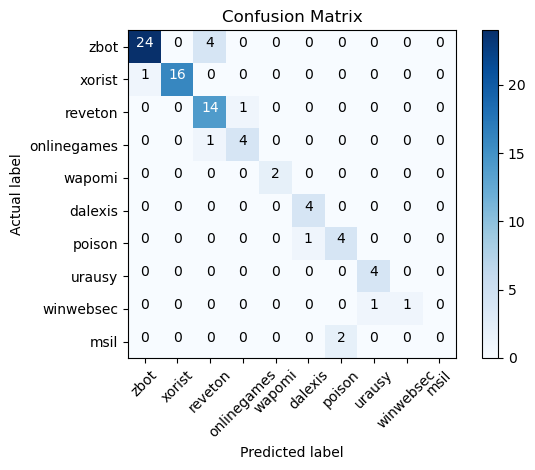

In [29]:
import numpy as np
import matplotlib.pyplot as plt


conf_matrix = np.array(conf_matrix)


plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)


thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()